In [3]:
import numpy as np

# Class exercises

__Exercise 1.__ Suppose a coin is weighted such that, when tossed it comes up heads 70% of times. What is the entropy of this coin?

\begin{align*}
H(X)
&= \sum_{i=1}^2 \mathbb{P}(X = x_i) \log (\mathbb{P}(X = x_i)) \\
&= 0.3 \log (0.3) + 0.7 \log (0.7) \\
&\approx -0.8812908992306927
\end{align*}

In [27]:
-sum([p * np.log2(p) for p in [0.3, 0.7]])

0.8812908992306927

__Exercise 2.__ What is the entropy of a fair dice? 

\begin{align*}
H(X)
&= \sum_{i=1}^2 p_i \log (p_i) \\
&= 6 * \frac{1}{6} \log (\frac{1}{6}) \\
&= \log (\frac{1}{6})
\end{align*}

In [26]:
-np.log2(1 / 6)

2.584962500721156

__Exercise 3.__ What is the entropy of a dice that shows 
- "1": 20% of times, 
- "2": 10% of times,
- "3": 5% of times,
- "4": 20% of times,
- "5": 30% of times,
- "6": 15% of times    

\begin{align*}
H(X)
&= \sum_{i=1}^2 p_i \log (p_i) \\
&= 0.20 \log(0.20) + 0.10 \log(0.10) + 0.05 \log(0.05) + 0.20 \log(0.20) + 0.30 \log(0.30) + 0.15 \log(0.15)
\end{align*}

In [30]:
all_proba = [0.20, 0.10, 0.05, 0.20, 0.30, 0.15]
-np.sum([p * np.log(p) for p in all_proba])

1.6695801269814072

__Exercise 4.__ Compute the Kullback-Leibler divergence between the dice of Exercise 2 and the dice of Exercise 3.

\begin{align*}
KL(X_2 \| X_3)
&= \sum_{i=1}^6 \mathbb{P}(X_2 = x_i) \log\left(\frac{\mathbb{P}(X_2 = x_i)}{\mathbb{P}(X_3 = x_i)}\right) \\
&= \frac{1}{6} \left[\log(\frac{1/6}{0.20}) + \log(\frac{1/6}{0.10}) + \log(\frac{1/6}{0.05}) + \log(\frac{1/6}{0.20}) + \log(\frac{1/6}{0.30}) + \log(\frac{1/6}{0.15}) \right]
\end{align*}

\begin{align*}
KL(X_3 \| X_2)
&= \sum_{i=1}^6 \mathbb{P}(X_3 = x_i) \log\left(\frac{\mathbb{P}(X_3 = x_i)}{\mathbb{P}(X_2 = x_i)}\right) \\
&= 0.20 \log(6 \times 0.20) + 0.10 \log(6 \times 0.10) + 0.05 \log(6 \times 0.05) + 0.20 \log(6 \times 0.20) + 0.30 \log(6 \times 0.30) + 0.15 \log(6 \times 0.15)
\end{align*}

In [36]:
# From 2 to 3
print(np.sum([np.log((1/6) / p) for p in all_proba]) / 6)

# From 3 to 2
print(np.sum([p * np.log(6 * p) for p in all_proba]))


0.14462152754328744
0.1221793422466478


# Assignment 4.2

This time we are going to work with the diabetes dataset.


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [45]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

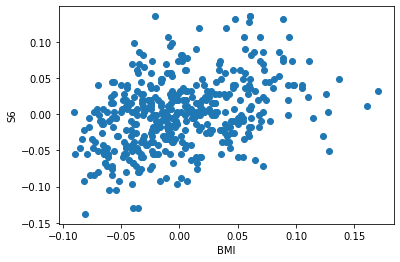

In [46]:
plt.scatter(data[:,2], data[:,9])
plt.xlabel('BMI')
plt.ylabel('S6')
plt.show()

In [61]:
df = pd.DataFrame(data=data, columns=dataset.feature_names)
df["target"] = target

px.scatter_matrix(df, color="target")


__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

In [117]:
X = df[dataset.feature_names[2]]
y = df[dataset.feature_names[9]]

In [118]:
X

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

store_mse = []

# for degree in range(5):
degree = 2

# define polynomial model
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))

# define linear model
model = LinearRegression()
model.fit(X_poly, y)

# predict
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

store_mse.append(mse)

linspace_domain = np.linspace(X.min(), X.max(), len(y))
linspace_pred = model.predict(poly.transform(linspace_domain.reshape(-1, 1)))

go.Figure(
    data=[go.Scatter(x=linspace_domain, y=linspace_pred, mode="lines")],
)


__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results